
In epidemiology, a case fatality rate (CFR) — sometimes called case fatality risk — is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a certain period of time. A CFR is conventionally expressed as a percentage and represents a measure of disease severity. CFRs are most often used for diseases with discrete, limited time courses, such as outbreaks of acute infections. A CFR can only be considered final when all the cases have been resolved (either died or recovered). The preliminary CFR, for example, during the course of an outbreak with a high daily increase and long resolution time would be substantially lower than the final CFR.

In epidemiology, the basic reproduction number (sometimes called basic reproductive ratio, or incorrectly basic reproductive rate, and denoted R0, pronounced R nought or R zero) of an infection can be thought of as the expected number of cases directly generated by one case in a population where all individuals are susceptible to infection. The definition describes the state where no other individuals are infected or immunized (naturally or through vaccination). Some definitions, such as that of the Australian Department of Health, add absence of "any deliberate intervention in disease transmission". The basic reproduction number is not to be confused with the effective reproduction number R, which is the number of cases generated in the current state of a population, which does not have to be the uninfected state. By definition, R0 cannot be modified through vaccination campaigns. Also, it is important to note that R0 is a dimensionless number and not a rate, which would have units of time like doubling time.

In [ ]:

# https://en.wikipedia.org/wiki/Case_fatality_rate

In [ ]:

command_str = '{sys.executable} -m pip install --upgrade statsmodels'.format(sys=sys)
print(command_str)
!{command_str}

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%pprint
%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
CFRs_df = s.load_object('CFRs_df')
R0s_df = s.load_object('R0s_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\covid19\ipynb\CFR-R0 Chart.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['CFRs_df', 'Config', 'In', 'Out', 'R0s_df', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '__warningregistry__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print

In [ ]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"


---
# Get the Data

In [11]:

set(CFRs_df.Disease)

{'Coronavirus disease 2019 (COVID-19)', 'Intestinal capillariasis', 'Middle Eastern Respiratory Syndrome (MERS)', 'Bubonic plague', 'Malaria', 'Legionellosis', 'Cryptococcal meningitis', 'Pertussis (whooping cough), infants in developing countries', 'Marburg virus disease – all outbreaks combined', 'Influenza A virus subtype H5N1', 'Leptospirosis', 'Varicella (chickenpox), adults', 'African trypanosomiasis', 'Smallpox, Variola minor', 'Brucellosis', 'Anthrax, gastrointestinal, intestinal type', 'Balamuthia', 'Severe acute respiratory syndrome (SARS)', 'Angiostrongyliasis', 'Lassa fever', 'Rabies', 'Eastern equine encephalitis virus', 'Hong Kong (1968–69) flu', 'Macanine alphaherpesvirus 1', 'AIDS/HIV infection', 'Plague, septicemic', 'Anorexia Nervosa', 'Hantavirus infection', 'Venezuelan Equine Encephalitis (VEE)', 'Visceral leishmaniasis', 'Asian (1956–58) flu', 'Glanders, septicemic', 'Hepatitis A, adults > 50 years old', 'Tuberculosis, HIV Negative', 'Cancer (overall)', 'Tularemia,

In [62]:

def f(x):
    
    return 'pert' in str(x).lower()

mask_series = CFRs_df.Disease.map(f)
CFRs_df[mask_series].to_dict()

{'Disease': {50: 'Pertussis (whooping cough), infants in developing countries', 59: 'Pertussis (whooping cough), children in developing countries'}, 'Treatment': {50: 'Unvaccinated', 59: 'Unvaccinated'}, 'CFR': {50: 3.7, 59: 1.0}, 'Notes': {50: nan, 59: 'For children 1–4 years old.'}}

In [63]:

mask_series = (R0s_df.Disease == 'Pertussis')
R0s_df.loc[mask_series, 'Disease'] = 'Pertussis (whooping cough), infants in developing countries'

In [75]:

row_dict = {}
row_dict['Disease'] = 'Polio'
row_dict['Treatment'] = 'Untreated'
row_dict['CFR'] = 15
row_dict['Notes'] = 'The case fatality rate (CFR) varies by age: 2 to 5 percent of children and up to 15 to 30 percent of adults die.'
CFRs_df = pd.concat([CFRs_df, pd.DataFrame([row_dict])]).reset_index(drop=True)

In [76]:

set(R0s_df.Disease) - set(CFRs_df.Disease)

{'Rubella', 'Common cold'}

In [87]:

merged_df = R0s_df.merge(CFRs_df, on='Disease').set_index('Disease', drop=True)

In [89]:

column_description_dict = s.load_object('column_description_dict')

In [90]:

def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        s.store_objects(column_description_dict=column_description_dict)
    
    return column_description

In [92]:

svg_dir = os.path.join(s.saves_folder, 'svg')
os.makedirs(name=svg_dir, exist_ok=True)

In [95]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = plt.scatter(x=df[ev_column_name].tolist(), y=df[rv_column_name].tolist(), s=None, c=None, marker=None, cmap=None,
                                     norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None,
                                     plotnonfinite=False, data=df)
    xlabel_text = plt.xlabel('{}'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{}'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif ('sars' in label.lower()):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(50, -20), **kwargs)
        elif ('kong' in label.lower()):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-65, 120), **kwargs)
        elif ('swine' in label.lower()):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-50, 100-2.7842095), **kwargs)
        elif ('seasonal' in label.lower()):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-25, 70-1.9397546), **kwargs)
        elif ('spanish' in label.lower()):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-59, 128), **kwargs)
        elif ('19' in label):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-75, 35), **red_kwargs)
        '''else:
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=ev_min_xytext, **kwargs)'''
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(17.4, 34.4, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center')
    plt.suptitle(t='Relative Deadliness and Infectiousness of the Wuhan Flu Pandemic', x=0.5, y=0.91)
    left, right = plt.xlim()
    bottom, top = plt.ylim()
    file_path = os.path.join(svg_dir, 'pandemic.svg')
    plt.savefig(file_path)
    with open(file_path, 'r') as f:
        xml_str = f.read()
        d_regex = re.compile('d="([^"\r\n]+)[\r\n]+')
        while d_regex.search(xml_str):
            xml_str = d_regex.sub(r'd="\g<1>', xml_str)
        with open(file_path, 'w') as f:
            print(xml_str.strip(), file=f)
    
    return file_path, left, right, bottom, top

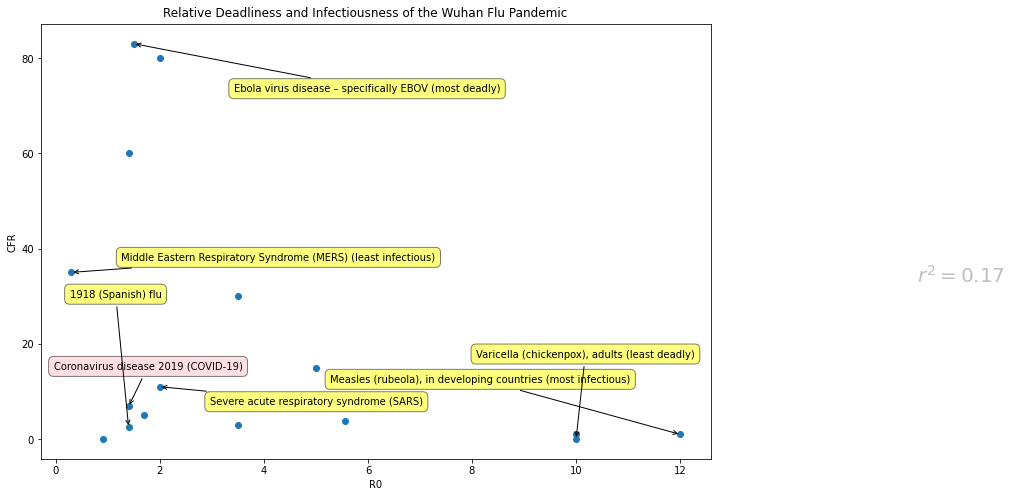

In [101]:

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
red_kwargs = dict(textcoords='offset points', ha='left', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
                  arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'R0'
rv_column_name = 'CFR'

ev_min_str = 'least infectious'
ev_max_str = 'most infectious'
rv_min_str = 'least deadly'
rv_max_str = 'most deadly'
ev_min_xytext = (50, 10)
ev_max_xytext = (-350, 50)
rv_min_xytext = (-100, 80)
rv_max_xytext = (100, -50)
columns_list = [ev_column_name, rv_column_name]
file_path, left, right, bottom, top = show_linear_scatterplot(merged_df, columns_list, ev_min_str=ev_min_str,
                                                              ev_max_str=ev_max_str, rv_min_str=rv_min_str,
                                                              rv_max_str=rv_max_str)

In [81]:

merged_df.columns

Index(['Disease', 'Transmission', 'R0', 'Treatment', 'CFR', 'Notes'], dtype='object')